Nama : Mahendra Adiastoro

NIM : 5312422005

Prodi : Teknik Komputer

In [1]:
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-dsp-comm
import sk_dsp_comm.iir_design_helper as iir_d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 2.2 MB/s eta 0:00:00


In [3]:
# Parameter filter
fs = 48000  # Frekuensi sampling
f_pass = 5000  # Frekuensi batas bawah jalur lintasan (passband)
f_stop = 8000  # Frekuensi batas atas jalur hentian (stopband)

# Merancang filter Butterworth
b_but, a_but, sos_but = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'butter')

# Merancang filter Chebyshev tipe 1
b_cheb1, a_cheb1, sos_cheb1 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby1')

# Merancang filter Chebyshev tipe 2
b_cheb2, a_cheb2, sos_cheb2 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby2')

# Merancang filter elliptic (Cauer)
b_elli, a_elli, sos_elli = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'ellip')

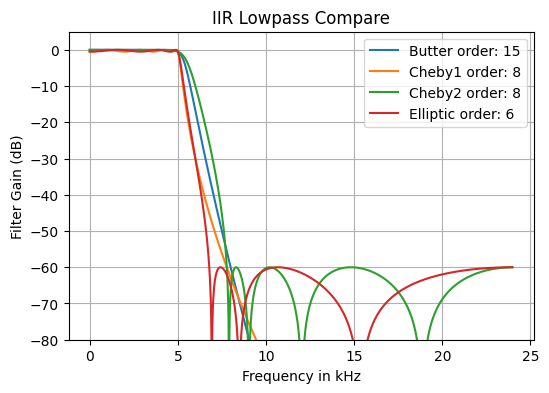

In [4]:
# Memanggil fungsi freqz_resp_cas_list dari modul iir_d
# Fungsi ini mengambil daftar filter IIR dalam bentuk Second-Order Sections (SOS) dan
# memplot respons frekuensi dari masing-masing filter.
# fs=48 adalah frekuensi sampel yang digunakan dalam filter.
iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48)

# Menentukan batas-batas sumbu y pada plot
plt.ylim([-80, 5])

# Memberi judul pada plot
plt.title(r'IIR Lowpass Compare')

# Memberi label pada sumbu y
plt.ylabel(r'Filter Gain (dB)')

# Memberi label pada sumbu x
plt.xlabel(r'Frequency in kHz')

# Menambahkan legenda pada plot yang menjelaskan masing-masing filter
plt.legend((r'Butter order: %d' % (len(a_but) - 1),  # Menampilkan orde filter Butterworth
            r'Cheby1 order: %d' % (len(a_cheb1) - 1),  # Menampilkan orde filter Chebyshev Tipe 1
            r'Cheby2 order: %d' % (len(a_cheb2) - 1),  # Menampilkan orde filter Chebyshev Tipe 2
            r'Elliptic order: %d' % (len(a_elli) - 1)),  # Menampilkan orde filter Elip
           loc='best')  # Menempatkan legenda pada posisi terbaik

# Menambahkan grid pada plot
plt.grid()

Gambar di atas menunjukkan grafik perbandingan respons filter lowpass IIR dengan berbagai tipe dan urutan. Sumbu horizontal menggambarkan frekuensi dalam kHz, sedangkan sumbu vertikal menunjukkan keuntungan filter (Filter Gain) dalam dB.

Grafik ini membandingkan empat jenis filter lowpass IIR dengan urutan berbeda:

- Garis biru: Filter Butterworth dengan urutan 15.
- Garis oranye: Filter Chebyshev 1 dengan urutan 8.
- Garis hijau: Filter Chebyshev 2 dengan urutan 8.
- Garis merah: Filter Elliptic dengan urutan 6.

Perbedaan dalam grafik menunjukkan bagaimana masing-masing filter meredam frekuensi di luar rentang lowpass dengan cara yang berbeda. Filter Butterworth memiliki transisi yang lebih halus, sementara filter lainnya menunjukkan pola redaman frekuensi yang lebih tajam.

(15, 15)

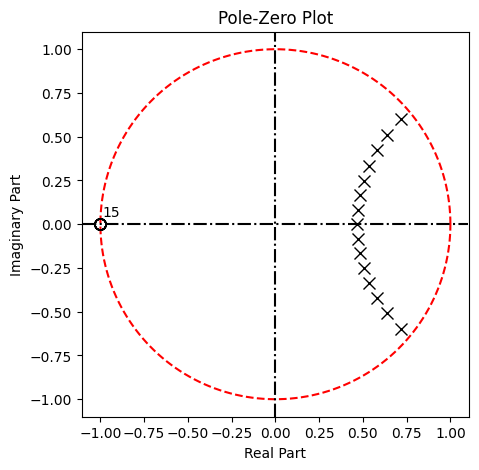

In [5]:
#memplot diagram pola nol dan pola pol dari filter yang direpresentasikan dalam bentuk Second-Order Sections (SOS)
iir_d.sos_zplane(sos_but)

**A Half-Band Filter Design to Pass up to  W/2 when  fs=8 kHz**

In [6]:
import sk_dsp_comm.multirate_helper as mrh

In [7]:
# Desain filter IIR lowpass elliptic
# Fungsi IIR_lpf() digunakan untuk merancang filter IIR lowpass
# dengan menggunakan metode elliptic
# Argumen:
# - 1950: frekuensi cut-off rendah
# - 2050: frekuensi cut-off tinggi
# - 0.5: toleransi ripples (dalam dB)
# - 80: gain stopband (dalam dB)
# - 8000: frekuensi sampel
# - 'ellip': jenis filter (elliptic)
b_lp, a_lp, sos_lp = iir_d.IIR_lpf(1950, 2050, 0.5, 80, 8000., 'ellip')

# Melakukan multirate IIR filtering
# Fungsi multirate_IIR() digunakan untuk mengoptimalkan filter IIR
# untuk penggunaan pada proses multirate
mr_lp = mrh.multirate_IIR(sos_lp)

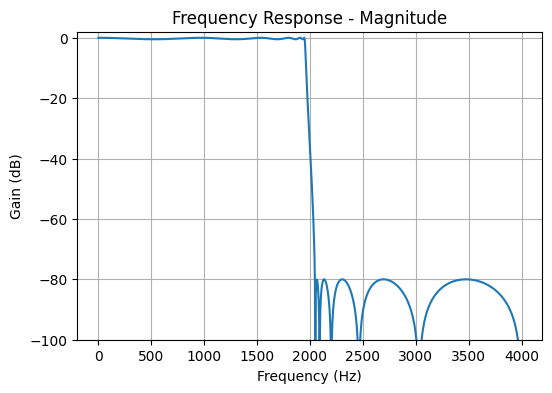

In [8]:
#digunakan untuk mendapatkan respons frekuensi filter dalam dB pada frekuensi sampel 8000 Hz
mr_lp.freq_resp('db',8000)

Gambar tersebut menampilkan respons frekuensi - Magnitude dari suatu sistem atau filter, diukur dalam skala desibel (dB). Sumbu horizontal (x) merepresentasikan frekuensi dalam Hertz (Hz), sementara sumbu vertikal (y) menunjukkan gain (penguatan) dalam dB.

Berikut adalah penjelasan lebih rinci:

- **Frekuensi Cut-off**: Grafik ini menunjukkan bahwa filter memiliki frekuensi cut-off sekitar 2000 Hz. Sebelum titik ini, gain (penguatan) hampir konstan di sekitar 0 dB, artinya sinyal melewati filter tanpa perubahan besar dalam amplitudonya.
- **Attenuasi Setelah Cut-off**: Setelah frekuensi cut-off, gain menurun drastis, menandakan bahwa frekuensi di atas 2000 Hz sangat ditekan atau diattenuasi. Penurunan ini sangat tajam, menunjukkan karakteristik filter yang sangat selektif.
- **Ripples di Stopband**: Setelah titik cut-off, terlihat adanya beberapa riak di daerah stopband (sekitar 2000-4000 Hz). Riak ini menunjukkan fluktuasi dalam penguatan, namun secara umum, sinyal di daerah ini tetap sangat terattenuasi.
- **Jenis Filter**: Berdasarkan bentuk respons frekuensinya, ini tampaknya adalah filter low-pass, yang dirancang untuk melewatkan frekuensi rendah dan menekan frekuensi tinggi.

Secara keseluruhan, gambar ini menggambarkan kinerja filter dalam menekan frekuensi di atas 2000 Hz dengan sangat efektif, ditandai oleh penurunan gain yang signifikan di daerah tersebut.

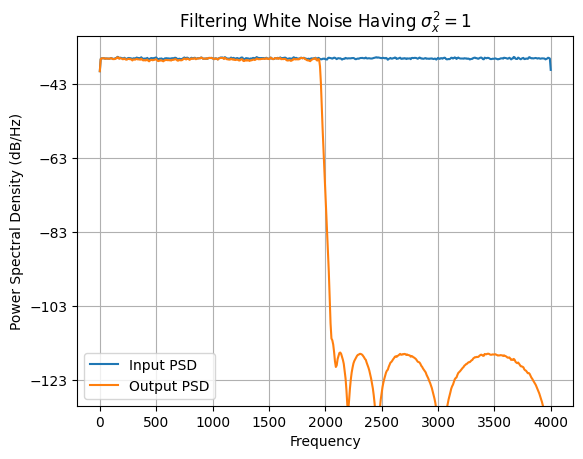

In [9]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt
# Generate 1 juta sampel dari noise Gaussian putih
x = np.random.randn(1000000)

# Terapkan filter (mr_lp) ke sinyal noise putih yang dihasilkan
# Variabel 'y' akan berisi sinyal yang sudah difilter
y = mr_lp.filter(x)

# Plot densitas spektral daya (PSD) dari sinyal noise putih asli 'x'
plt.psd(x, 2**10, 8000)

# Plot densitas spektral daya (PSD) dari sinyal yang sudah difilter 'y'
plt.psd(y, 2**10, 8000)

# Atur judul plot
plt.title(r'Filtering White Noise Having $\sigma_x^2 = 1$')

# Tambahkan legenda ke plot untuk membedakan antara input dan output PSD
plt.legend(('Input PSD', 'Output PSD'), loc='best')

# Atur batas sumbu y untuk visualisasi yang lebih baik
plt.ylim([-130, -30])

# Tampilkan plot
plt.show()

Gambar ini menunjukkan plot densitas spektral daya (Power Spectral Density atau PSD) dari input dan output dalam proses penyaringan white noise dengan varians $\sigma_x^2 = 1$.

Sumbu horizontal menunjukkan frekuensi dalam unit tertentu, sedangkan sumbu vertikal menunjukkan densitas spektral daya dalam unit dB/Hz. Grafik ini menampilkan dua kurva:

- **Input PSD (biru)**: Kurva ini menunjukkan densitas spektral daya dari white noise sebelum disaring, yang tetap konstan sekitar -43 dB/Hz untuk seluruh rentang frekuensi.
- **Output PSD (oranye)**: Kurva ini menunjukkan densitas spektral daya setelah white noise disaring. Terlihat ada penurunan yang signifikan sekitar frekuensi 2000 Hz, dengan bentuk kurva yang menurun tajam hingga sekitar -123 dB/Hz sebelum sedikit naik kembali tetapi tetap lebih rendah dibandingkan dengan inputnya.

Dari plot ini, dapat disimpulkan bahwa filter yang digunakan sangat efektif dalam meredam frekuensi sekitar 2000 Hz, bahkan hampir meniadakan densitas spektral daya pada rentang frekuensi tersebut. Jaringan grid pada plot membantu memperjelas pembacaan nilai pada setiap sumbu.

In [10]:
from numpy import log10
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz
